---
title: "Pandas"
description: "Pandas snippets"
categories: [code snippets, jupyter, python]
date: "2020-03-05"
toc: true
---

## Set numer of columns/rows

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## 'SettingWithCopyWarning'

In [1]:
import pandas as pd
df = pd.DataFrame({'Number' : [100,200,300,400,500], 'Letter' : ['a','b','c', 'd', 'e']})
df

,Number,Letter
0,100,a
1,200,b
2,300,c
3,400,d
4,500,e


In [2]:
criteria = df['Number']>300
criteria

0    False
1    False
2    False
3     True
4     True
Name: Number, dtype: bool

### Boolean filters

In [3]:
df[criteria]

,Number,Letter
3,400,d
4,500,e


In [4]:
#Create a new DataFrame based on filtering criteria
df_2 = df[criteria]

In [5]:
#Assign a new column and print output
df_2['new column'] = 'new value'
df_2

<ipython-input-5-5103b36367d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['new column'] = 'new value'


,Number,Letter,new column
3,400,d,new value
4,500,e,new value


### Using .loc[]

In [6]:
#Create New DataFrame Based on Filtering Criteria
df_2 = df.loc[criteria, :]

In [7]:
#Add a New Column to the DataFrame
df_2.loc[:, 'new column'] = 'new value'
df_2

/Users/fabian/.venv/fastai/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/fabian/.venv/fastai/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Number,Letter,new column
3,400,d,new value
4,500,e,new value


### Solution 1: using indices

In [12]:
df_2 = df[criteria]

In [13]:
criteria_row_indices = df[criteria].index
criteria_row_indices

Int64Index([3, 4], dtype='int64')

In [14]:
new_df = df.loc[criteria_row_indices, :]
new_df

,Number,Letter
3,400,d
4,500,e


In [16]:
new_df['New Column'] = 'New Value'
new_df

,Number,Letter,New Column
3,400,d,New Value
4,500,e,New Value


### Solution 2: using `.copy()`

In [26]:
df[criteria]

,Number,Letter
3,400,d
4,500,e


In [27]:
#Create a new DataFrame based on filtering criteria
df_2 = df[criteria].copy()

In [28]:
#Assign a new column and print output
df_2['new column'] = 'new value'
df_2

,Number,Letter,new column
3,400,d,new value
4,500,e,new value


## Conditional assignments

### using `.map`

In [3]:
df['Number'].map({100:1, 200:2})

0    1.0
1    2.0
2    NaN
3    NaN
4    NaN
Name: Number, dtype: float64

### using `.apply`

Similiar to `.map` but with a function.

In [9]:
def criteria(num):
    return 0 if num>300 else 1

In [10]:
df['Number'].apply(criteria)

0    1
1    1
2    1
3    0
4    0
Name: Number, dtype: int64

## Oversampling

Oversampling is a very useful technique that can be used across many contexts to a great effect https://arxiv.org/abs/1710.05381.

In [5]:
from fastai2.tabular.all import *
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
titanic.dropna(subset=['embark_town'], inplace=True)

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


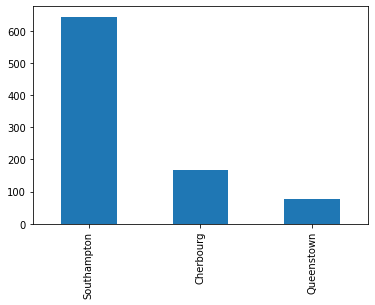

In [7]:
titanic.embark_town.value_counts().plot.bar();

In [9]:
df = pd.DataFrame(1 / titanic.embark_town.value_counts())

In [10]:
weights = titanic.embark_town.apply(lambda x: df.to_dict()['embark_town'][x])

In [11]:
weighted_sample = titanic.sample(n=900, weights=weights, replace=True)

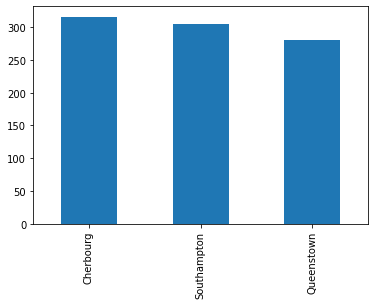

In [12]:
weighted_sample.embark_town.value_counts().plot.bar();

In [14]:
weighted_sample.duplicated().value_counts()

True     485
False    415
dtype: int64

## Categorify

In [15]:
cat_vars = ['survived', 'pclass', 'sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
cont_vars = ['age', 'sibsp', 'parch', 'fare']

In [16]:
titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [18]:
criteria = titanic.columns.isin(cat_vars)
titanic.loc[:,criteria] = titanic.loc[:,criteria].astype('category')

In [19]:
titanic.dtypes

survived       category
pclass         category
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male     category
deck           category
embark_town    category
alive          category
alone          category
dtype: object

## Pandas table styling

In [2]:
#hide
from fastai2.vision.all import *
path = untar_data(URLs.MNIST_SAMPLE)
threes = (path/'train'/'3').ls().sorted()
im3_path = threes[1]
im3 = Image.open(im3_path)

In [3]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0
